The goal is to train a classification model that can predict whether a given mass is malignant or benign based on its features. Once the model is trained, it can be used to make predictions on new patients by identifying the k-nearest neighbors in the training data and assigning the class label that appears most frequently among these neighbors.
For classification, the algorithm identifies the k-nearest neighbors of a new data point and assigns the class label that appears most frequently among these neighbors.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading data into dataframe
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Preprocessing

In [3]:
# checking the data for null or missing values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [4]:
#droppinf off any null rows (is any)
data = data.dropna()

#Checking the data type of each column
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
# Drop id column because its not relevant
data = data.drop("id", axis=1)

# Convert diagnosis column from letters to numbers (Malignant: 1, Benign: 0) to use KNN
data["diagnosis"] = np.where(data["diagnosis"]=="M", 1, 0)

# KNN regression

In [6]:
# Sepratating & assigning features and target columns to X & y
y = data['diagnosis']
X = data.drop('diagnosis',axis=1)
X.shape, y.shape


# Splitting the dataset into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

#Using standard scaler as a standardization technique.
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

# instantiate the model
knn = KNeighborsRegressor()
param_grid = {'n_neighbors':list(range(1, 31)),'p': [1, 2], 'weights': ['uniform', 'distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'metric' : ['minkowski','euclidean','manhattan']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=5)

# fit the model 
knn_grid.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

In [7]:
# find the best score
print("Best Score: ", knn_grid.best_score_)

# get the hyperparameters with the best score
print("Best Hyperparameters", knn_grid.best_params_)

Best Score:  0.8727583347735031
Best Hyperparameters {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


In [8]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.867

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.17673330405595758


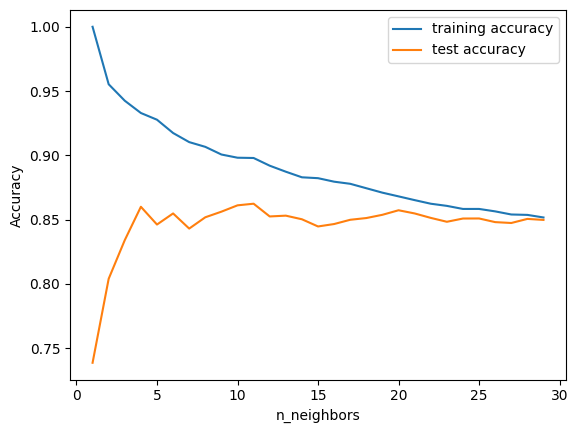

In [9]:
training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)
for n in neighbors_settings:
    # fit the model
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

    
#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

# KNN Classification
# Evaluate the model using the best n_neighbors

In [10]:
# Creating KNN Model using the best parameters
knn_classifier = KNeighborsClassifier(**knn_grid.best_params_)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Predict the test data
y_pred = knn_classifier.predict(X_test)

# Classification metrics
print("Classification accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n")
print(classification_report(y_test, y_pred))

Classification accuracy: 0.956140350877193
Classification report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [11]:
# Checking The model accuracy with confusion matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[68  3]
 [ 2 41]]


The given results are based on a classification model's performance on a breast cancer dataset. The model achieved an overall accuracy of 95.61%, indicating that it classified correctly 109 out of 114 samples.

The precision score for class 0 (no cancer) is 0.97, indicating that 97% of the samples classified as not having cancer were indeed negative for cancer. The precision score for class 1 (cancer) is 0.93, indicating that 93% of the samples classified as having cancer were indeed positive for cancer.

The confusion matrix shows that out of 71 negative samples, 68 were correctly classified, and three were falsely classified as positive. Out of 43 positive samples, 41 were correctly classified, and two were falsely classified as negative.

Considering the fact that we are dealing with cancer classification, false negative classifications are more critical than false positive classifications. This is because a false negative classification could result in a patient not receiving proper treatment, leading to potentially life-threatening consequences. Therefore, it is important to consider the five false classifications (three false negatives and two false positives) in this scenario and further optimize the model's performance to minimize the number of false negative classifications.